In [ ]:
# RESNET
# https://github.com/broadinstitute/keras-resnet

In [30]:
import keras
import keras_resnet.models
import os
import numpy as np
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

ImportError: cannot import name 'History'

In [ ]:
# https://github.com/broadinstitute/keras-resnet
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [17]:
target_height = 64
target_width  = 64

In [18]:
shape, classes = (target_height, target_width, 1), 10

In [19]:
x = keras.layers.Input(shape)
model = keras_resnet.models.ResNet50(x, classes=classes)
model.compile("adam", "categorical_crossentropy", ["accuracy"])

In [ ]:
# learn how input data should be formatted

In [13]:
# shape train data

In [5]:
version_number = '0_1'

In [6]:
TRAIN_PATH = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/train_' + version_number + '/'
TEST_PATH  = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/test_' + version_number + '/'

In [ ]:
# NOT USED BELOW

In [54]:
# load all images in directory
# change dimension to numpy array of dimension (number of images, height, width, channel)
feature = []
directory = TRAIN_PATH
for image_name in tqdm(os.listdir(directory)):
    img = load_img(directory + image_name)
    x = img_to_array(img)
    feature.append(x)
feature = np.array(feature)

100%|████████████████████████████████████████████████████████████████████████████████| 456/456 [00:17<00:00, 15.98it/s]


In [63]:
print(feature.nbytes/1024/1024, 'MB used')

3315.0558471679688 MB used


In [ ]:
# NOT USED ABOVE

In [31]:
train_datagen = ImageDataGenerator()
history = keras.callbacks.History()

In [32]:
train_generator = train_datagen.flow_from_directory(TRAIN_PATH, 
                                                    target_size = (target_height, target_width),
                                                    color_mode = 'grayscale'
                                                   )

TypeError: flow_from_directory() got an unexpected keyword argument 'callbacks'

In [34]:
history = model.fit_generator(train_generator, 
                              epochs = 3,
                              callbacks=[history]
                             )

Epoch 1/3
15/15 [==============================] - ETA: 1:03 - loss: 14.1033 - acc: 0.12 - ETA: 58s - loss: 14.6070 - acc: 0.0938 - ETA: 53s - loss: 14.2712 - acc: 0.114 - ETA: 50s - loss: 14.4811 - acc: 0.101 - ETA: 45s - loss: 14.5063 - acc: 0.100 - ETA: 40s - loss: 14.1873 - acc: 0.119 - ETA: 35s - loss: 14.0314 - acc: 0.129 - ETA: 31s - loss: 13.9144 - acc: 0.136 - ETA: 26s - loss: 13.9914 - acc: 0.131 - ETA: 21s - loss: 14.1033 - acc: 0.125 - ETA: 17s - loss: 14.1949 - acc: 0.119 - ETA: 12s - loss: 14.2293 - acc: 0.117 - ETA: 8s - loss: 14.2196 - acc: 0.117 - ETA: 4s - loss: 14.2832 - acc: 0.11 - 61s 4s/step - loss: 14.3055 - acc: 0.1125
Epoch 2/3
15/15 [==============================] - ETA: 57s - loss: 14.6070 - acc: 0.093 - ETA: 54s - loss: 14.3552 - acc: 0.109 - ETA: 49s - loss: 13.4317 - acc: 0.166 - ETA: 45s - loss: 13.5996 - acc: 0.156 - ETA: 41s - loss: 14.0026 - acc: 0.131 - ETA: 36s - loss: 14.1033 - acc: 0.125 - ETA: 32s - loss: 14.1753 - acc: 0.120 - ETA: 28s - loss: 1

dict_keys(['loss', 'acc'])


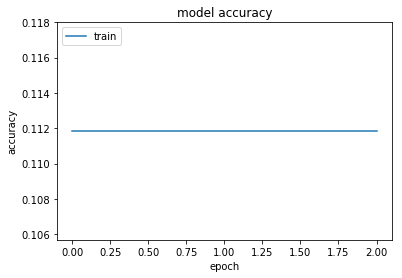

In [37]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()

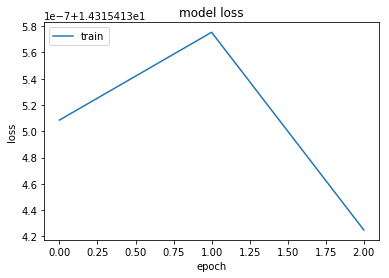

In [38]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()

In [28]:
history.history['loss']

[14.315413709272418,
 14.315413508498878,
 14.315413441574364,
 14.315413575423392,
 14.31541349176775,
 14.31541369254129,
 14.31541349176775,
 14.315413776196932,
 14.31541349176775,
 14.315413575423392]